<a href="https://colab.research.google.com/github/manikanta5557/simple_machine_learning-Notebooks/blob/main/convolutional_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,datasets,models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [ ]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train=y_train.reshape(-1,)
y_train[:5]
y_test=y_test.reshape(-1,)

In [ ]:
classes =['aeroplane',"automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def drawer(x,y,index):
  plt.figure(figsize=(10,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

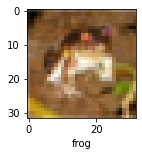

In [ ]:
drawer(X_train,y_train,0)

In [ ]:
X_train = X_train /255.0
X_test = X_test / 255.0


In [ ]:
cnn = models.Sequential([
                  layers.Conv2D(filters=32 ,kernel_size=(3, 3) ,activation='relu',input_shape=(32,32,3)),
                  layers.MaxPooling2D((2,2)),
                  layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
                  layers.MaxPooling2D((2,2)),

                  layers.Flatten(),
                  layers.Dense(64,activation='relu'),
                  layers.Dense(10,activation='softmax')
                
])

In [ ]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8968 - accuracy: 0.6852
Epoch 2/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8455 - accuracy: 0.7064
Epoch 3/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.8018 - accuracy: 0.7186
Epoch 4/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.7662 - accuracy: 0.7311
Epoch 5/10
1563/1563 [==============================] - 54s 35ms/step - loss: 0.7317 - accuracy: 0.7444
Epoch 6/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.7036 - accuracy: 0.7533
Epoch 7/10
1563/1563 [==============================] - 54s 35ms/step - loss: 0.6760 - accuracy: 0.7641
Epoch 8/10
1563/1563 [==============================] - 54s 34ms/step - loss: 0.6522 - accuracy: 0.7717
Epoch 9/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.6305 - accuracy: 0.7792
Epoch 10/10
1563/1563 [==============================] - 53s 34m

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.9775 - accuracy: 0.6637


[0.9775236248970032, 0.6636999845504761]

y_pred = cnn.predict(X_test)
y_classes = [np.argmax(element) for element in y_pred]
y_classes[0:5]

In [ ]:
y_pred = cnn.predict(X_test)
y_classes = [np.argmax(element) for element in y_pred]
y_classes[0:20]

[3, 8, 8, 0, 4, 6, 1, 2, 3, 1, 0, 9, 7, 7, 9, 6, 5, 7, 8, 6]

In [ ]:
y_test[0:20]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6],
      dtype=uint8)

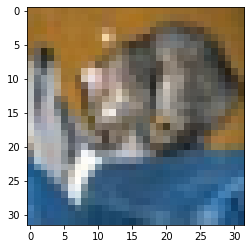

In [ ]:
plt.imshow(X_test[0])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import cv2

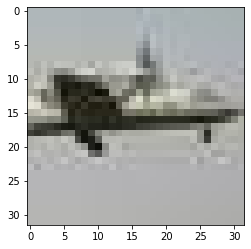

In [ ]:
img =image.load_img('/content/download.jpg')
plt.imshow(img)
xx=cv2.imread('/content/download.jpg')

In [ ]:
train = ImageDataGenerator(rescale=1/255)
testdata=train.flow_from_directory('/content/drive/MyDrive/deep learning/first model image detector',target_size=(32,32))
print(testdata)

Found 1 images belonging to 2 classes.


i have loaded a frog image and got it correct


In [ ]:
x = cnn.predict(testdata)
print(classes[np.argmax(x)])

frog


saving our model


In [ ]:
model_json = cnn.to_json()
with open("model.json",'w') as file:
  file.write(model_json)


In [ ]:
cnn.save_weights("weights.h5")

In [ ]:
from tensorflow.keras .models import model_from_json
with open ('model.json','r') as file:
  model_json = file.read()
loaded_model = model_from_json(model_json)
loaded_model.load_weights('weights.h5')